# Predicting States of Manufacturing Control Data 🏭

**Objective:** Build a powerfull GBDT Model that can provide a good estimation.

**Strategy:** I think I will follow this strategy:

**Level 1 Getting Started**

* Quick EDA to identify potential opportunities.
* Simple pre-processing step to encode categorical features.
* A basic CV strategy using 90% for TRaining and 10% for Testing.
* Looking at the feature importances.
* Creating a submission file.
* Submit the file to Kaggle.

**Level 2 Feature Engineering**
* Feature engineering using text information. (Massive boost in the score)
* Cross validation loop (**Work in Progress...**)

---

**Data Description**

For this challenge, you are given (simulated) manufacturing control data and are tasked to predict whether the machine is in state 0 or state 1. 
The data has various feature interactions that may be important in determining the machine state.

Good luck!

**Files**
* train.csv - the training data, which includes normalized continuous data and categorical data
* test.csv - the test set; your task is to predict binary target variable which represents the state of a manufacturing process
* sample_submission.csv - a sample submission file in the correct format

---

**Notebooks Ideas and Credits**

I took ideas or inspiration from the following notebooks, if you enjoy my work, please take a look to the notebooks that inspire my work.

**TPSMAY22 Gradient-Boosting Quickstart:** https://www.kaggle.com/code/ambrosm/tpsmay22-gradient-boosting-quickstart/notebook




---

# 1. Loading the Requiered Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2022/train.csv
/kaggle/input/tabular-playground-series-may-2022/test.csv


---


# 2. Setting the Notebook

In [2]:
%%time
# I like to disable my Notebook Warnings.
import warnings
warnings.filterwarnings('ignore')

CPU times: user 26 µs, sys: 3 µs, total: 29 µs
Wall time: 31.5 µs


In [3]:
%%time
# Notebook Configuration...

# Amount of data we want to load into the Model...
DATA_ROWS = None
# Dataframe, the amount of rows and cols to visualize...
NROWS = 50
NCOLS = 15
# Main data location path...
BASE_PATH = '...'

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.2 µs


In [4]:
%%time
# Configure notebook display settings to only use 2 decimal places, tables look nicer.
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', NCOLS) 
pd.set_option('display.max_rows', NROWS)

CPU times: user 65 µs, sys: 7 µs, total: 72 µs
Wall time: 74.4 µs


---

# 3. Loading the Information (CSV) Into A Dataframe

In [5]:
%%time
# Load the CSV information into a Pandas DataFrame...
trn_data = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/train.csv')
tst_data = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/test.csv')

sub = pd.read_csv('/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv')

CPU times: user 7.28 s, sys: 760 ms, total: 8.04 s
Wall time: 12.7 s


---

# 4. Exploring the Information Available

## 4.1. Analysing the Trian Dataset

In [6]:
%%time
# Explore the shape of the DataFrame...
trn_data.shape

CPU times: user 26 µs, sys: 2 µs, total: 28 µs
Wall time: 32.9 µs


(900000, 33)

In [7]:
%%time
# Display simple information of the variables in the dataset...
trn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [8]:
%%time
# Display the first few rows of the DataFrame...
trn_data.head()

CPU times: user 75 µs, sys: 7 µs, total: 82 µs
Wall time: 85.8 µs


,id,f_00,f_01,f_02,f_03,f_04,f_05,...,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.37,0.24,-0.24,0.57,-0.65,0.84,...,-0.21,1.36,ABABDADBAB,67.61,0,0,0
1,1,1.70,-1.71,-2.23,-0.55,1.11,-1.55,...,-3.78,-0.06,ACACCADCEB,377.10,0,0,1
2,2,1.68,0.62,-1.03,0.81,-0.61,0.11,...,2.79,-3.70,AAAEABCKAD,-195.60,0,2,1
3,3,-0.12,-0.59,-0.80,2.09,0.37,-0.13,...,-2.53,-0.61,BDBBAACBCB,210.83,0,0,1
4,4,1.15,-0.18,-0.66,-1.10,0.47,0.50,...,-3.31,4.37,BDBCBBCHFE,-217.21,0,1,1


In [9]:
%%time
# Generate a simple statistical summary of the DataFrame, Only Numerical...
trn_data.describe()

CPU times: user 862 ms, sys: 41.3 ms, total: 903 ms
Wall time: 905 ms


,id,f_00,f_01,f_02,f_03,f_04,f_05,...,f_24,f_25,f_26,f_28,f_29,f_30,target
count,"900,000.00","900,000.00","900,000.00","900,000.00","900,000.00","900,000.00","900,000.00",...,"900,000.00","900,000.00","900,000.00","900,000.00","900,000.00","900,000.00","900,000.00"
mean,"449,999.50",-0.00,0.00,0.00,-0.00,-0.00,0.00,...,-0.34,0.18,0.36,-0.38,0.35,1.00,0.49
std,"259,807.77",1.00,1.00,1.00,1.00,1.00,1.00,...,2.39,2.42,2.48,238.77,0.48,0.82,0.50
min,0.00,-4.60,-4.68,-4.64,-4.66,-4.75,-4.75,...,-11.42,-11.92,-14.30,"-1,229.75",0.00,0.00,0.00
25%,"224,999.75",-0.68,-0.68,-0.67,-0.68,-0.68,-0.67,...,-1.96,-1.44,-1.26,-159.43,0.00,0.00,0.00
50%,"449,999.50",0.00,0.00,0.00,-0.00,-0.00,-0.00,...,-0.34,0.16,0.40,-0.52,0.00,1.00,0.00
75%,"674,999.25",0.67,0.68,0.68,0.67,0.67,0.68,...,1.27,1.80,2.03,158.99,1.00,2.00,1.00
max,"899,999.00",4.75,4.82,4.96,4.45,4.95,4.97,...,12.39,12.53,12.91,"1,229.56",1.00,2.00,1.00


In [10]:
%%time
# Calculates the total number of missing values...
trn_data.isnull().sum().sum()

CPU times: user 127 ms, sys: 0 ns, total: 127 ms
Wall time: 127 ms


0

In [11]:
%%time
# Display the number of missing values by variable...
trn_data.isnull().sum()

CPU times: user 123 ms, sys: 38 µs, total: 123 ms
Wall time: 123 ms


id        0
f_00      0
f_01      0
f_02      0
f_03      0
f_04      0
f_05      0
f_06      0
f_07      0
f_08      0
f_09      0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
target    0
dtype: int64

In [12]:
%%time
# Display the number of unique values for each variable...
trn_data.nunique()

CPU times: user 888 ms, sys: 1.07 ms, total: 889 ms
Wall time: 890 ms


id        900000
f_00      900000
f_01      900000
f_02      900000
f_03      900000
f_04      900000
f_05      900000
f_06      900000
f_07          16
f_08          16
f_09          15
f_10          15
f_11          14
f_12          16
f_13          13
f_14          14
f_15          15
f_16          16
f_17          14
f_18          14
f_19      900000
f_20      900000
f_21      900000
f_22      900000
f_23      900000
f_24      900000
f_25      900000
f_26      900000
f_27      741354
f_28      900000
f_29           2
f_30           3
target         2
dtype: int64

In [13]:
# Display the number of unique values for each variable, sorted by quantity...
trn_data.nunique().sort_values(ascending = True)

target         2
f_29           2
f_30           3
f_13          13
f_18          14
f_17          14
f_14          14
f_11          14
f_10          15
f_09          15
f_15          15
f_07          16
f_12          16
f_16          16
f_08          16
f_27      741354
f_00      900000
f_28      900000
f_26      900000
f_25      900000
f_24      900000
f_23      900000
f_22      900000
f_20      900000
f_19      900000
f_01      900000
f_02      900000
f_03      900000
f_04      900000
f_05      900000
f_06      900000
f_21      900000
id        900000
dtype: int64

In [14]:
%%time
# Check some of the categorical variables
categ_cols = ['f_29','f_30','f_13', 'f_18','f_17','f_14','f_11','f_10','f_09','f_15','f_07','f_12','f_16','f_08','f_27']
trn_data[categ_cols].sample(5)

CPU times: user 53.3 ms, sys: 17.9 ms, total: 71.2 ms
Wall time: 70.9 ms


,f_29,f_30,f_13,f_18,f_17,f_14,f_11,f_10,f_09,f_15,f_07,f_12,f_16,f_08,f_27
106041,0,1,4,2,0,1,1,0,1,2,3,3,1,4,BABCBADQBB
606674,1,2,0,0,1,2,1,1,0,3,1,6,1,0,ABBFBBECEC
392782,1,1,6,3,1,1,1,2,1,3,1,2,5,1,BABDCBDKAA
485818,0,1,1,0,2,0,3,0,5,0,0,3,4,2,ADBCDACDDF
876338,0,0,2,0,0,0,3,2,0,3,1,4,1,4,BDBABBABCE


In [15]:
%%time
# Generate a quick correlation matrix to understand the dataset better
correlation = trn_data.corr()

CPU times: user 2.27 s, sys: 41.3 ms, total: 2.31 s
Wall time: 2.31 s


In [16]:
%%time
# Diplay the correlation matrix
correlation

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


,id,f_00,f_01,f_02,f_03,f_04,f_05,...,f_24,f_25,f_26,f_28,f_29,f_30,target
id,1.00,-0.00,0.00,0.00,0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00
f_00,-0.00,1.00,-0.00,0.00,-0.00,-0.00,0.00,...,0.00,0.00,0.00,0.19,0.00,-0.00,0.06
f_01,0.00,-0.00,1.00,0.00,-0.00,-0.00,0.00,...,-0.00,-0.00,0.00,0.19,-0.00,-0.00,0.06
f_02,0.00,0.00,0.00,1.00,0.00,0.00,-0.00,...,-0.00,-0.00,0.00,0.21,-0.00,-0.00,0.03
f_03,0.00,-0.00,-0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.33,-0.00,0.00,-0.00
f_04,0.00,-0.00,-0.00,0.00,0.00,1.00,0.00,...,0.00,-0.00,-0.00,0.17,-0.00,0.00,0.00
f_05,0.00,0.00,0.00,-0.00,0.00,0.00,1.00,...,-0.00,0.00,0.00,0.30,-0.00,-0.00,0.03
f_06,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.16,0.00,0.00,-0.00
f_07,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,...,0.00,-0.00,-0.00,0.00,-0.05,0.00,0.01
f_08,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,-0.00,-0.00,-0.00,0.06,0.00,0.04


In [17]:
%%time
# Check the most correlated variables to the target
correlation['target'].sort_values(ascending = False)[:5]

CPU times: user 1.24 ms, sys: 20 µs, total: 1.26 ms
Wall time: 1.03 ms


target   1.00
f_21     0.13
f_24     0.09
f_23     0.08
f_09     0.07
Name: target, dtype: float64

In [18]:
%%time
# Check the least correlated variables to the target
correlation['target'].sort_values(ascending = True)[:5]

CPU times: user 0 ns, sys: 634 µs, total: 634 µs
Wall time: 535 µs


f_19   -0.09
f_11   -0.08
f_16   -0.04
f_20   -0.04
f_10   -0.04
Name: target, dtype: float64

---

## 4.2. Analysing the Trian Labels Dataset

In [19]:
%%time
# Check how well balanced is the dataset
trn_data['target'].value_counts()

CPU times: user 5.08 ms, sys: 7 µs, total: 5.09 ms
Wall time: 4.96 ms


0    462161
1    437839
Name: target, dtype: int64

In [20]:
%%time
# Check some statistics on the target variable
trn_data['target'].describe()

CPU times: user 20.9 ms, sys: 0 ns, total: 20.9 ms
Wall time: 22 ms


count   900,000.00
mean          0.49
std           0.50
min           0.00
25%           0.00
50%           0.00
75%           1.00
max           1.00
Name: target, dtype: float64

---

# 5. Feature Engineering

## 5.1 Text Base Features

In [21]:
%%time
# The idea is to create a simple funtion to count the amount of letters on feature 27.
# feature 27 seems quite important 

def count_sequence(df, field):
    '''
    For each letter of the provided suquence it return new feature with the number of occurences.
    '''
    alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']    
    
    for letter in alphabet:
        df[letter + '_count'] = df[field].str.count(letter)
    
    df["unique_characters"] = df['f_27'].apply(lambda s: len(set(s)))
    return df

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


In [22]:
%%time
# Utilizes the new created funtions to generate more features.
# trn_data = count_sequence(trn_data, 'f_27')
# tst_data = count_sequence(tst_data, 'f_27')

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.72 µs


In [23]:
%%time
def count_chars(df, field):
    '''
    Describes something...
    '''
    
    for i in range(10):
        df[f'ch_{i}'] = df[field].str.get(i).apply(ord) - ord('A')
        
    df["unique_characters"] = df[field].apply(lambda s: len(set(s)))
    return df

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [24]:
%%time
# Utilizes the new created funtions to generate more features.
trn_data = count_chars(trn_data, 'f_27')
tst_data = count_chars(tst_data, 'f_27')

CPU times: user 18.2 s, sys: 246 ms, total: 18.4 s
Wall time: 18.5 s


---

# 7. Pre-Processing Labels

In [25]:
%%time
# Define a label encoding function
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
def encode_features(df, cols = ['f_27']):
    for col in cols:
        df[col + '_enc'] = encoder.fit_transform(df[col])
    return df

trn_data = encode_features(trn_data)
tst_data = encode_features(tst_data)

CPU times: user 5.37 s, sys: 276 ms, total: 5.65 s
Wall time: 5.96 s


In [26]:
# Check the results of the transformation
trn_data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,...,ch_5,ch_6,ch_7,ch_8,ch_9,unique_characters,f_27_enc
0,0,-1.37,0.24,-0.24,0.57,-0.65,0.84,...,0,3,1,0,1,3,58066
1,1,1.70,-1.71,-2.23,-0.55,1.11,-1.55,...,0,3,2,4,1,5,155009
2,2,1.68,0.62,-1.03,0.81,-0.61,0.11,...,1,2,10,0,3,6,15319
3,3,-0.12,-0.59,-0.80,2.09,0.37,-0.13,...,0,2,1,2,1,4,658667
4,4,1.15,-0.18,-0.66,-1.10,0.47,0.50,...,1,2,7,5,4,6,673894


---

# 8. Feature Selection for Baseline Model

In [27]:
%%time
# Define what will be used in the training stage
ignore = ['id', 'target', 'f_27',  'f_27_enc'] # f_27 has been label encoded...

features = [feat for feat in trn_data.columns if feat not in ignore]
target_feature = 'target'

CPU times: user 40 µs, sys: 0 ns, total: 40 µs
Wall time: 44.8 µs


---

# 9. Creating a Simple Train / Test Split Strategy

In [28]:
%%time
# Creates a simple train split breakdown for baseline model
from sklearn.model_selection import train_test_split
test_size_pct = 0.20
X_train, X_valid, y_train, y_valid = train_test_split(trn_data[features], trn_data[target_feature], test_size = test_size_pct, random_state = 42)

CPU times: user 452 ms, sys: 166 ms, total: 618 ms
Wall time: 650 ms


---

# 10. Building a Baseline GBT Model, Simple Split

## 10.1 XGBoost Model

In [29]:
%%time
%%script false --no-raise-error
# Import the model libraries
from xgboost  import XGBClassifier

CPU times: user 2.85 ms, sys: 8.08 ms, total: 10.9 ms
Wall time: 22.2 ms


In [30]:
%%time
%%script false --no-raise-error
# Define the model parameters to get started we use default values to a certain degree
xgb_params = {'n_estimators'     : 8192,
              'min_child_weight' : 96,
              #'max_depth'        : 6,
              #'learning_rate'    : 0.15,
              #'subsample'        : 0.95,
              #'colsample_bytree' : 0.95,
              #'reg_lambda'       : 1.50,
              #'reg_alpha'        : 1.50,
              #'gamma'            : 1.50,
              'max_bin'          : 512,
              'random_state'     : 46,
              'objective'        : 'binary:logistic',
              'tree_method'      : 'gpu_hist',
             }

CPU times: user 2.41 ms, sys: 8.01 ms, total: 10.4 ms
Wall time: 16.8 ms


In [31]:
%%time
%%script false --no-raise-error
# Instanciate the XGBoost model using the previous parameters
xgb = XGBClassifier(**xgb_params)
xgb.fit(X_train, y_train, eval_set = [(X_valid, y_valid)], eval_metric = ['auc'], early_stopping_rounds = 256, verbose = 250)

CPU times: user 1.06 ms, sys: 7.89 ms, total: 8.95 ms
Wall time: 15.3 ms


In [32]:
%%time
%%script false --no-raise-error
# Check the model performance in the validation dataset
from sklearn.metrics import roc_auc_score
val_preds = xgb.predict_proba(X_valid[features])[:, 1]
roc_auc_score(y_valid, val_preds)

CPU times: user 2 ms, sys: 7.99 ms, total: 10 ms
Wall time: 15.9 ms


In [33]:
# Record some of the model results for future improvement
# Local Score = 0.9454953628406088 First Model Run >>> LB Score = 0.93147
# Local Score = 0.9448767329168479 First Model Run >>> LB Score = 0.93205

# 0.9816418086418166

---

## 10.2 LGMB Model

In [34]:
%%time
%%script false --no-raise-error
# Import the model libraries
from lightgbm import LGBMClassifier

CPU times: user 1.32 ms, sys: 8.96 ms, total: 10.3 ms
Wall time: 16.4 ms


In [35]:
%%time
%%script false --no-raise-error
# Define the model parameters to get started we use default values to a certain degree
lgb_params = {'n_estimators'      : 8192,
              'min_child_samples' : 96,
              'max_bins'          : 512,
              'random_state'      : 46,
             }

CPU times: user 2.97 ms, sys: 9.1 ms, total: 12.1 ms
Wall time: 16.7 ms


In [36]:
%%time
%%script false --no-raise-error
# Instanciate the XGBoost model using the previous parameters
lgb = LGBMClassifier(**lgb_params)
lgb.fit(X_train, y_train, eval_set = [(X_valid, y_valid)], eval_metric = ['auc'], early_stopping_rounds = 256, verbose = 250)

CPU times: user 0 ns, sys: 10.8 ms, total: 10.8 ms
Wall time: 15.9 ms


In [37]:
%%time
%%script false --no-raise-error
# Check the model performance in the validation dataset
from sklearn.metrics import roc_auc_score
val_preds = lgb.predict_proba(X_valid[features])[:, 1]
roc_auc_score(y_valid, val_preds)

CPU times: user 3.87 ms, sys: 8.09 ms, total: 12 ms
Wall time: 16.9 ms


---

# 11. Building a Baseline GBT Model, Kfold Loop

In [38]:
%%time
from lightgbm import LGBMClassifier
from xgboost  import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve
import math

CPU times: user 1.03 s, sys: 175 ms, total: 1.2 s
Wall time: 2.21 s


In [39]:
%%time
# Define the model parameters to get started we use default values to a certain degree
lgb_params = {'n_estimators'      : 8192, # Was 8192...
              'min_child_samples' : 96,
              'max_bins'          : 512,
              'random_state'      : 46,
             }

xgb_params = {'n_estimators'     : 8192,
              'min_child_weight' : 96,
              'max_depth'        : 6,
              'learning_rate'    : 0.15,
              'subsample'        : 0.95,
              'colsample_bytree' : 0.95,
              'reg_lambda'       : 1.50,
              'reg_alpha'        : 1.50,
              'gamma'            : 1.50,
              'max_bin'          : 512,
              'random_state'     : 46,
              'objective'        : 'binary:logistic',
              'tree_method'      : 'gpu_hist',
             }

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [40]:
%%time
# Create empty lists to store NN information...

score_list   = []
predictions  = [] 
# Define kfolds for training purposes...
kf = KFold(n_splits = 5)

for fold, (trn_idx, val_idx) in enumerate(kf.split(trn_data)):
    print(f'Training Fold {fold} ...')
    X_train, X_valid = trn_data.iloc[trn_idx][features], trn_data.iloc[val_idx][features]
    y_train, y_valid = trn_data.iloc[trn_idx][target_feature], trn_data.iloc[val_idx][target_feature]
    
    # LGBM (Uncomment to use, and Comment the XGBoost Part... LGBM Takes forever)
    # model = LGBMClassifier(**lgb_params)
    # model.fit(X_train, y_train, eval_set = [(X_valid, y_valid)], eval_metric = ['auc'], early_stopping_rounds = 256, verbose = 0)
    
    # XGBoost
    model = XGBClassifier(**xgb_params)
    model.fit(X_train, y_train, eval_set = [(X_valid, y_valid)], eval_metric = ['auc'], early_stopping_rounds = 256, verbose = 0)
    
    y_valid_pred = model.predict_proba(X_valid.values)[:,1]
    score = roc_auc_score(y_valid, y_valid_pred)

    score_list.append(score)
    print(f"Fold {fold}, AUC = {score:.3f}")
    print((''))
    
    tst_pred = model.predict_proba(tst_data[features].values)[:,1]
    predictions.append(tst_pred)

print(f'OOF AUC: {np.mean(score_list):.3f}')
print('.........')

Training Fold 0 ...
Fold 0, AUC = 0.983

Training Fold 1 ...
Fold 1, AUC = 0.984

Training Fold 2 ...
Fold 2, AUC = 0.983

Training Fold 3 ...
Fold 3, AUC = 0.984

Training Fold 4 ...
Fold 4, AUC = 0.983

OOF AUC: 0.983
.........
CPU times: user 5min 3s, sys: 3.23 s, total: 5min 7s
Wall time: 3min 38s


# 11. Undertanding Model Behavior, Feature Importance

In [41]:
%%time
# Define a funtion to plot the feature importance properly
def plot_feature_importance(importance, names, model_type, max_features = 10):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df = fi_df.head(max_features)

    #Define size of bar plot
    plt.figure(figsize=(8,6))
    
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

CPU times: user 0 ns, sys: 4 µs, total: 4 µs
Wall time: 7.15 µs


CPU times: user 111 ms, sys: 10.9 ms, total: 122 ms
Wall time: 154 ms


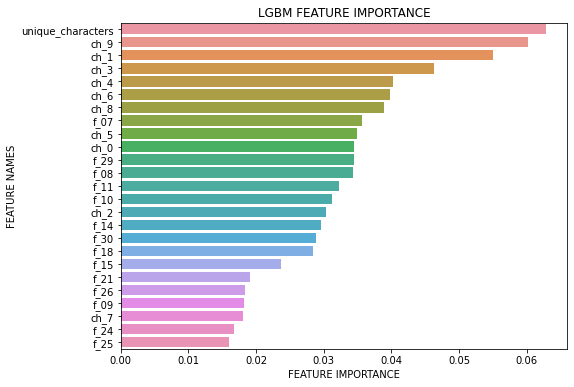

In [42]:
%%time
# Utilize the feature importance function to visualize the most valueable features
import seaborn as sns
import matplotlib.pyplot as plt
plot_feature_importance(model.feature_importances_,X_train.columns,'LGBM ', max_features = 25)

---

# 12. Baseline Model Submission File Generation

In [43]:
%%time
# Review the format of the submission file
sub.head()

CPU times: user 130 µs, sys: 2 µs, total: 132 µs
Wall time: 135 µs


,id,target
0,900000,0.50
1,900001,0.50
2,900002,0.50
3,900003,0.50
4,900004,0.50


In [44]:
%%time
# Populated the prediction on the submission dataset and creates an output file
sub['target'] = np.array(predictions).mean(axis=0)
sub.to_csv('my_submission_043022.csv', index = False)

CPU times: user 1.58 s, sys: 38 ms, total: 1.62 s
Wall time: 1.62 s


In [45]:
%%time
# Review the submission file as a final step to upload to Kaggle.
sub.head()

CPU times: user 73 µs, sys: 2 µs, total: 75 µs
Wall time: 78 µs


,id,target
0,900000,0.97
1,900001,0.99
2,900002,0.00
3,900003,0.05
4,900004,0.99


---